# Perform Maizemine API calls

## 0. Install Intermine

In [ ]:
pip install intermine

In [3]:
from intermine.webservice import Service
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')

## 1. Extract expression 

In [6]:
%%writefile ../data/NUE.tsv
NLP5	Zm00001d015201
NIGTa	Zm00001d023402
NIGTb	Zm00001d023411
NAC49	Zm00001d034601
NAC60	Zm00001d013003
GRAS3	Zm00001d030744
ZmCLE10B/ZmFOS1	Zm00001d039367
GGPS3	Zm00001d008370
WRKY83	Zm00001d038023
ICL1	Zm00001d021666
RTL1	Zm00001d011708
MYB21	Zm00001d035605
GLA3	Zm00001d013269
WRKY92	Zm00001d010399
NRTa	Zm00001d014976
NRTb	Zm00001d054057
NRTc	Zm00001d054060
NRTd	Zm00001d003287
NRTe	Zm00001d017095

Writing ../data/NUE.tsv


### 1.1 Connect to maize mine service

In [4]:

service = Service("http://maizemine.rnet.missouri.edu:8080/maizemine/service",username="averstichele@inari.com",password="mineminemine")


### 1.2 Create list of genes

In [7]:

symbols=pd.read_table('../data/NUE.tsv',header=None)[1].tolist()
print(symbols)

['Zm00001d015201', 'Zm00001d023402', 'Zm00001d023411', 'Zm00001d034601', 'Zm00001d013003', 'Zm00001d030744', 'Zm00001d039367', 'Zm00001d008370', 'Zm00001d038023', 'Zm00001d021666', 'Zm00001d011708', 'Zm00001d035605', 'Zm00001d013269', 'Zm00001d010399', 'Zm00001d014976', 'Zm00001d054057', 'Zm00001d054060', 'Zm00001d003287', 'Zm00001d017095']


In [8]:
# Create list of genes
list_name='GOI'

lm=service.list_manager()
lm.delete_lists([list_name])
lm.create_list(content=symbols,list_type="Gene",name=list_name)

### 1.3 Execute query

In [174]:
#Create query with the maizemine query builder

# Execute query
query = service.new_query("Expression")
query.add_view(
    "normalizedCounts", "gene.primaryIdentifier", "gene.symbol", "entityName",
    "gene.dbCrossReferences.refereeSource", "type", "gene.biotype",
    "sample.libraryLayout", "sample.sampleName", "sample.growthStage",
    "sample.sraBioProjectId", "sample.sraStudyId", "sample.organGroup",
    "sample.tissueDescription", "sample.name"
)
# query.add_constraint("gene", "LOOKUP", goi, "", code = "A")
query.add_constraint("gene", "IN", list_name, code = "B")

df=pd.concat([pd.DataFrame(row.to_d(), index=[0]) for row in query.rows()])

In [175]:
df.head()

,Expression.FPKM,Expression.entityName,Expression.id,Expression.normalizedCounts,Expression.type,Expression.gene.primaryIdentifier,Expression.gene.symbol,Expression.gene.dbCrossReferences.refereeSource,Expression.gene.biotype,Expression.sample.libraryLayout,Expression.sample.sampleName,Expression.sample.growthStage,Expression.sample.sraBioProjectId,Expression.sample.sraStudyId,Expression.sample.organGroup,Expression.sample.tissueDescription,Expression.sample.name
0,0.0,0_DAP_NOPOL_LEAF,187121513,0.0,mean,Zm00001d054057,None,AGPv3.21,protein_coding,SINGLE,0_DAP_NOPOL_LEAF,0 DAP,PRJNA171684,SRP014652,Leaf,Aging leaf,0_DAP_NOPOL_LEAF
0,0.0,0_DAP_NOPOL_LEAF,187121513,0.0,mean,Zm00001d054057,None,RefSeq,protein_coding,SINGLE,0_DAP_NOPOL_LEAF,0 DAP,PRJNA171684,SRP014652,Leaf,Aging leaf,0_DAP_NOPOL_LEAF
0,0.0,0_DAP_NOPOL_LEAF,187157797,0.0,mean,Zm00001d039367,None,AGPv3.21,protein_coding,SINGLE,0_DAP_NOPOL_LEAF,0 DAP,PRJNA171684,SRP014652,Leaf,Aging leaf,0_DAP_NOPOL_LEAF
0,0.0,0_DAP_NOPOL_LEAF,187157797,0.0,mean,Zm00001d039367,None,RefSeq,protein_coding,SINGLE,0_DAP_NOPOL_LEAF,0 DAP,PRJNA171684,SRP014652,Leaf,Aging leaf,0_DAP_NOPOL_LEAF
0,0.0,0_DAP_NOPOL_LEAF,188786636,0.0,mean,Zm00001d054060,None,AGPv3.21,protein_coding,SINGLE,0_DAP_NOPOL_LEAF,0 DAP,PRJNA171684,SRP014652,Leaf,Aging leaf,0_DAP_NOPOL_LEAF


#### 1.4 Plot results 

In [176]:
conv=pd.read_table('NUE.tsv',header=None).set_index(1).to_dict()[0]

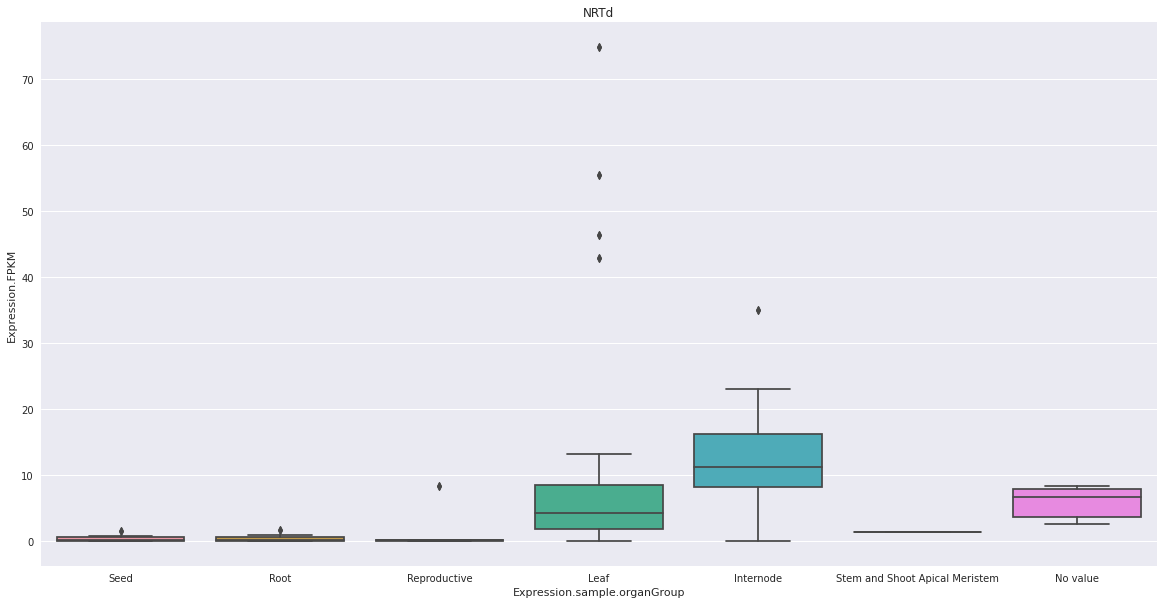

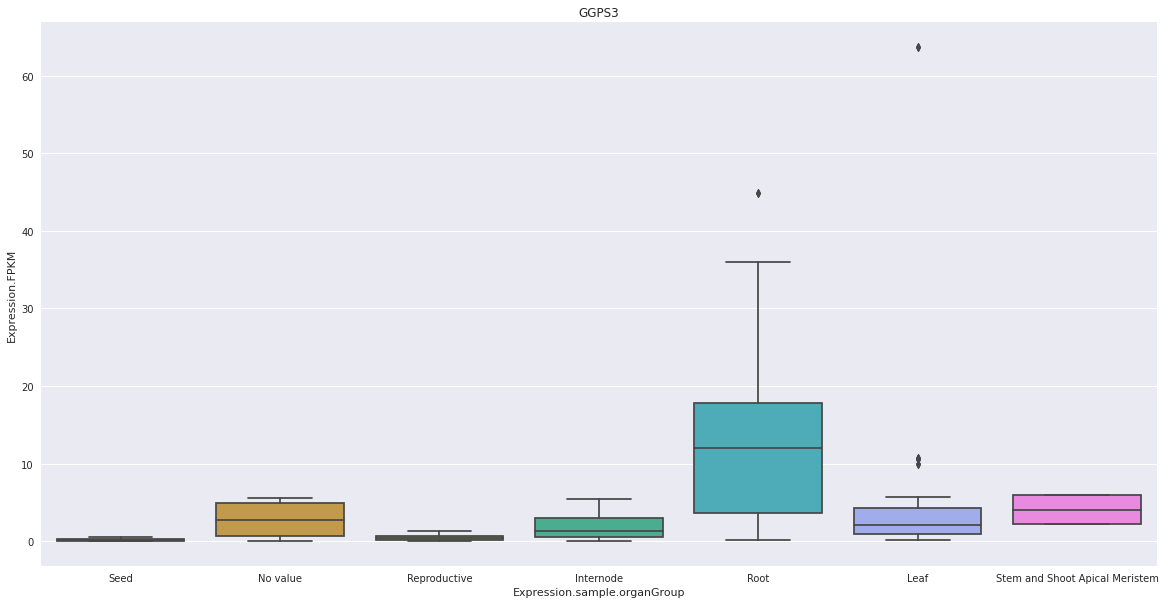

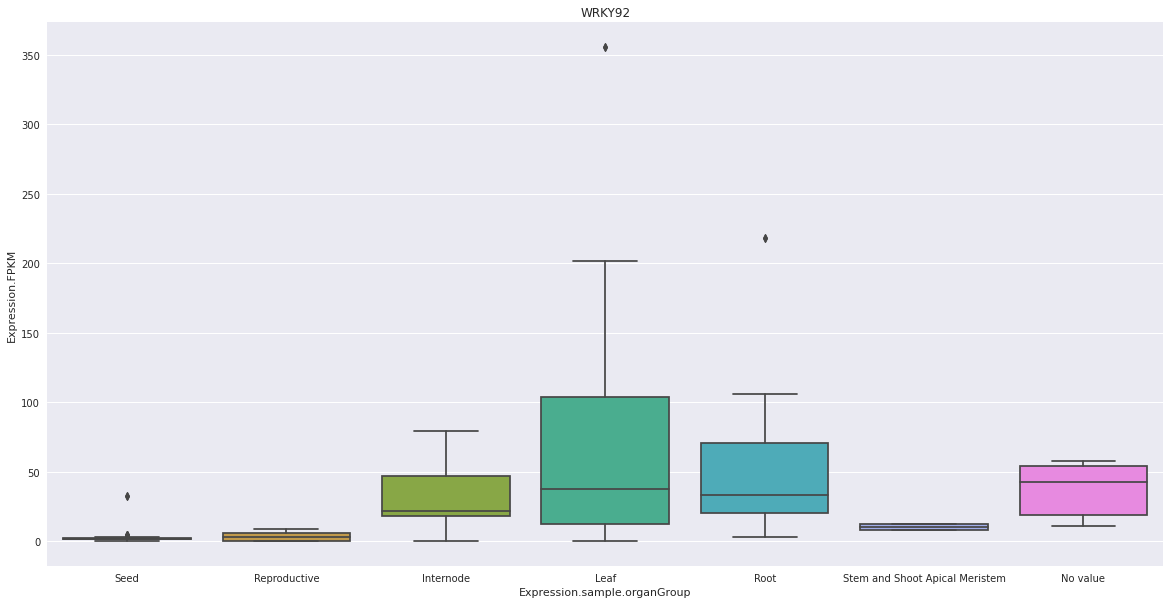

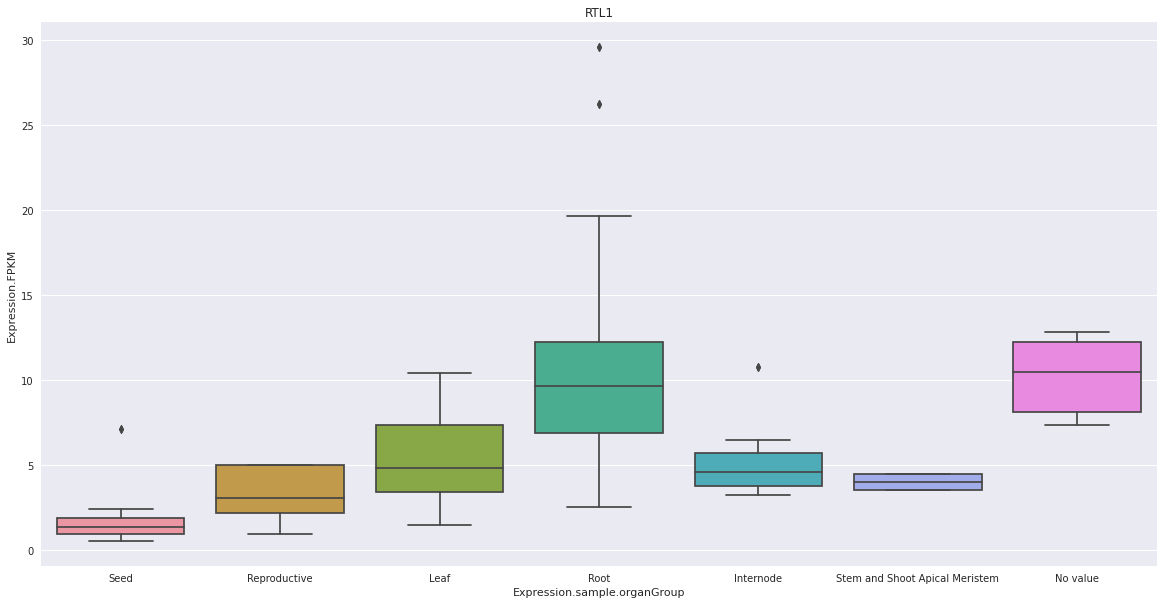

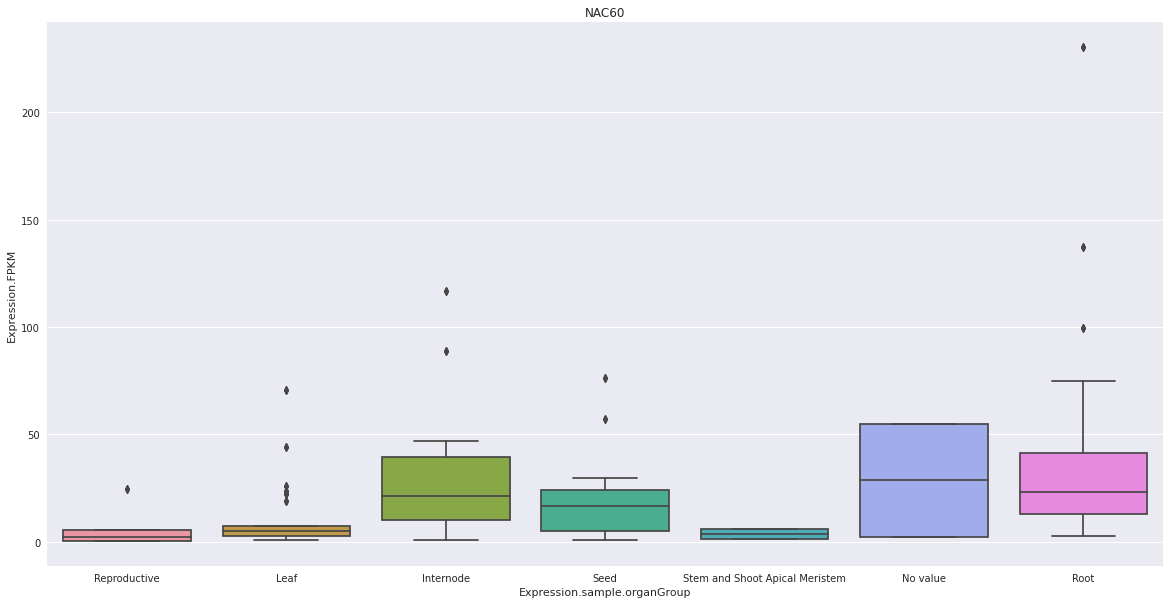

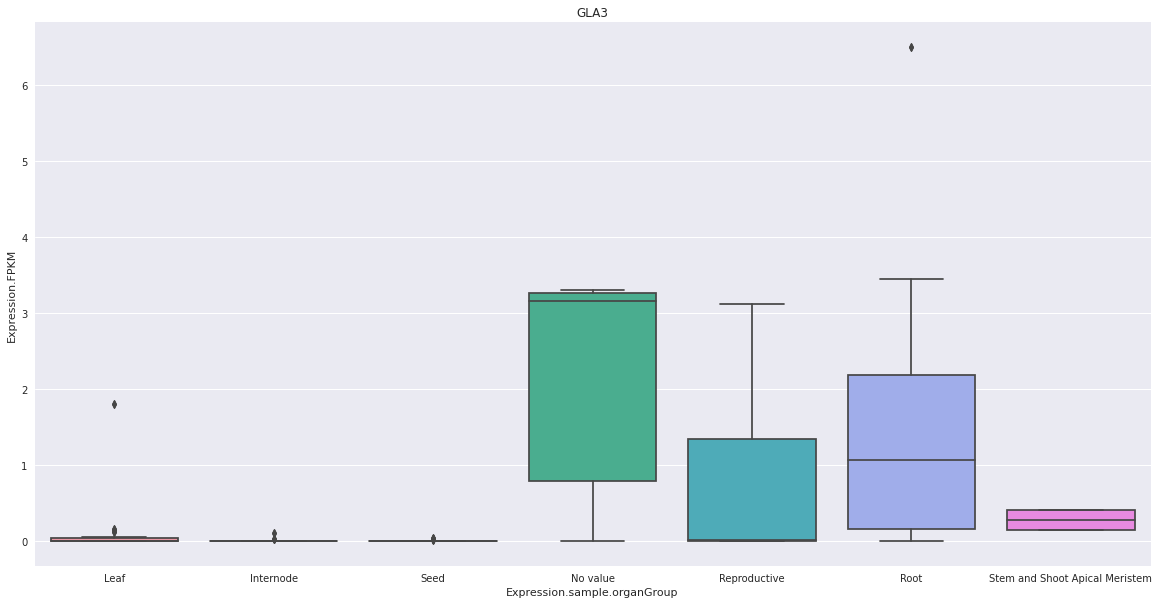

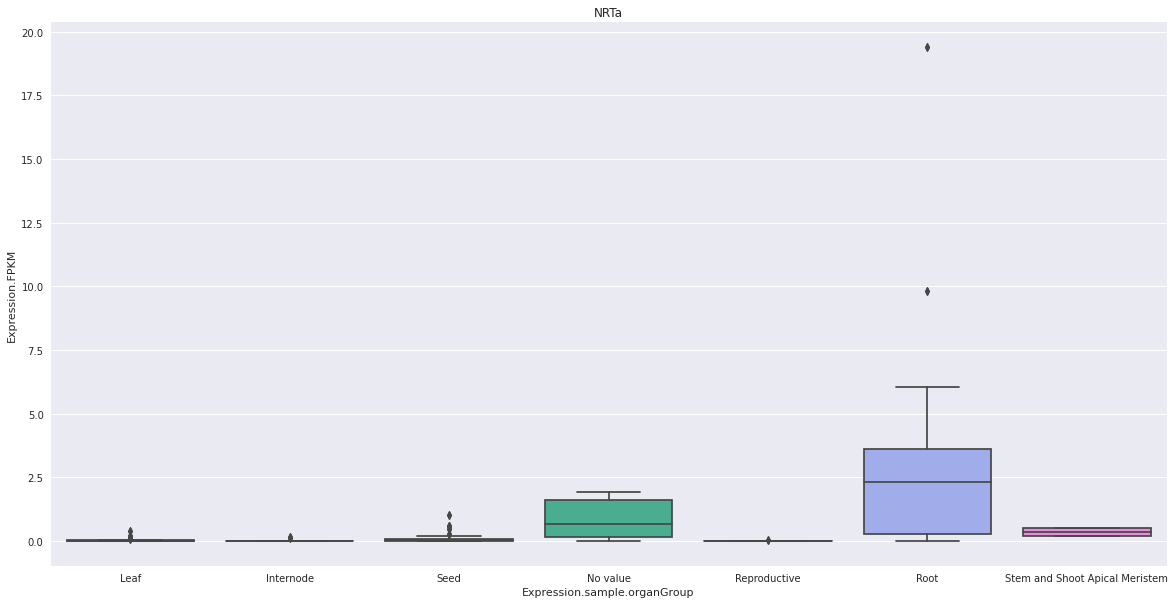

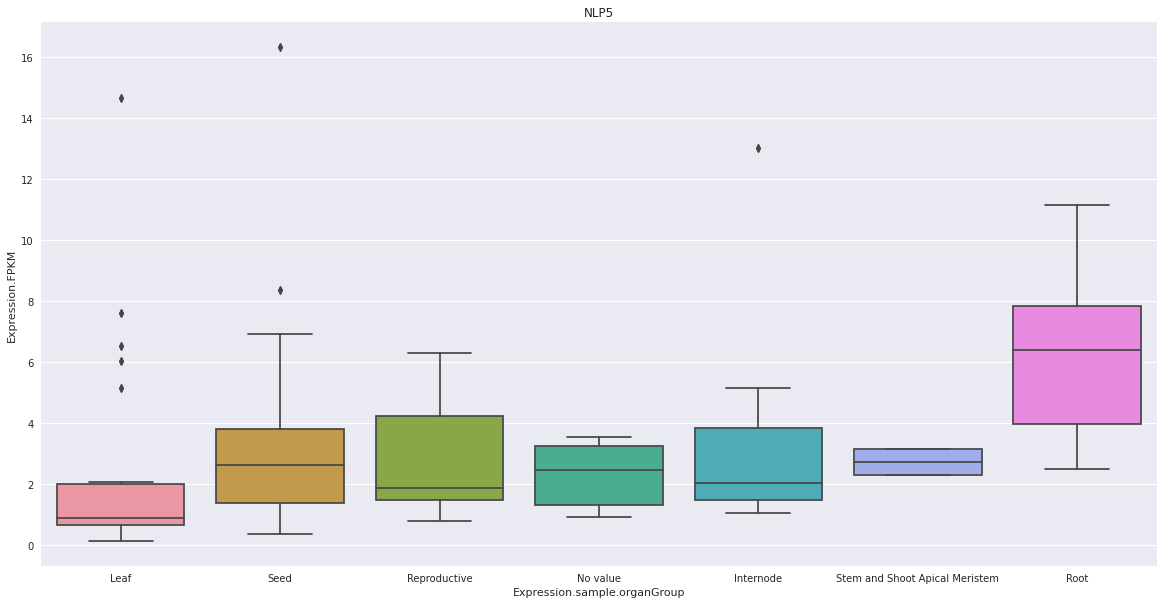

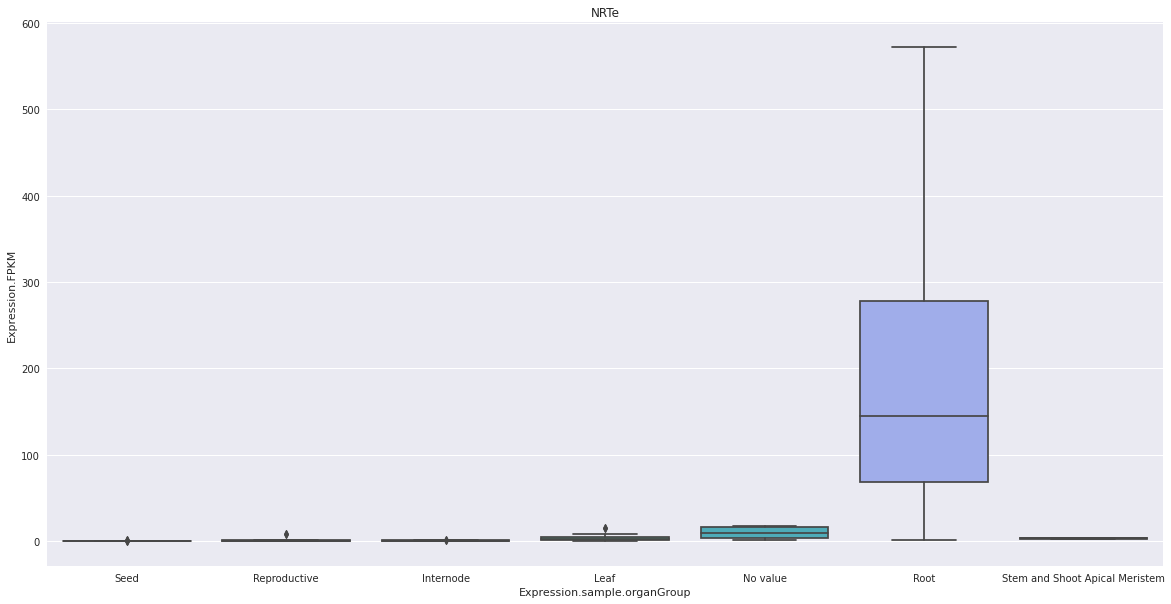

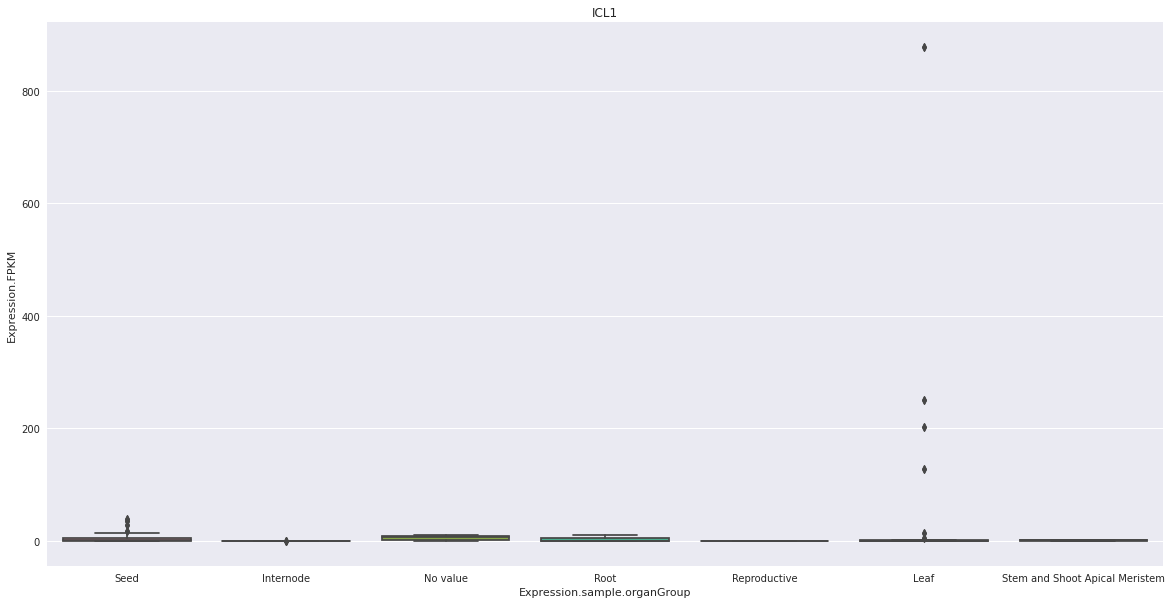

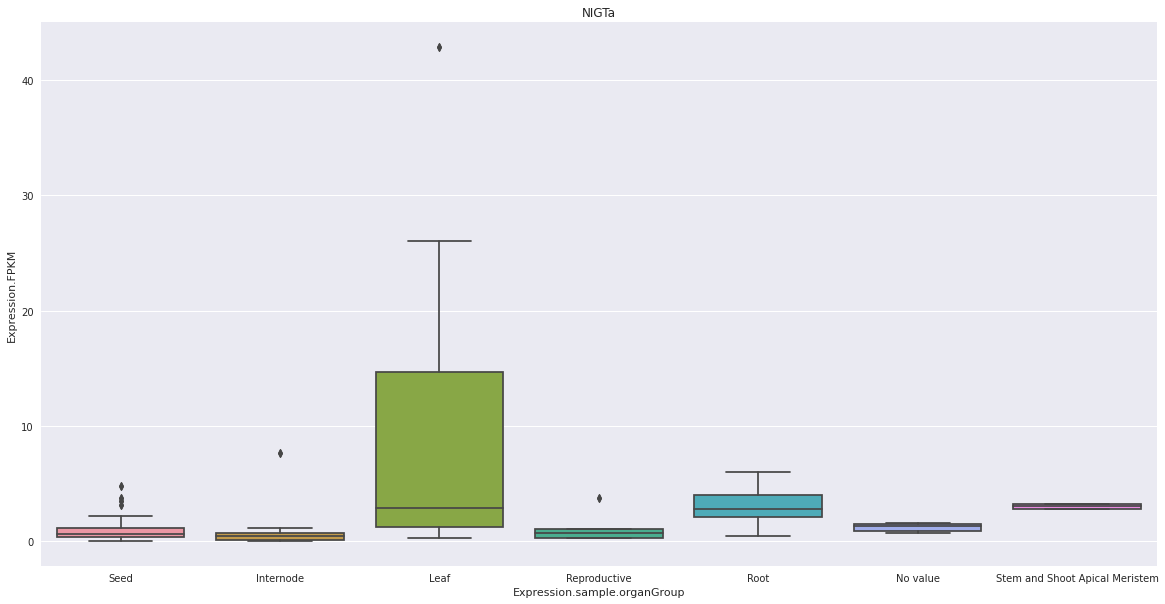

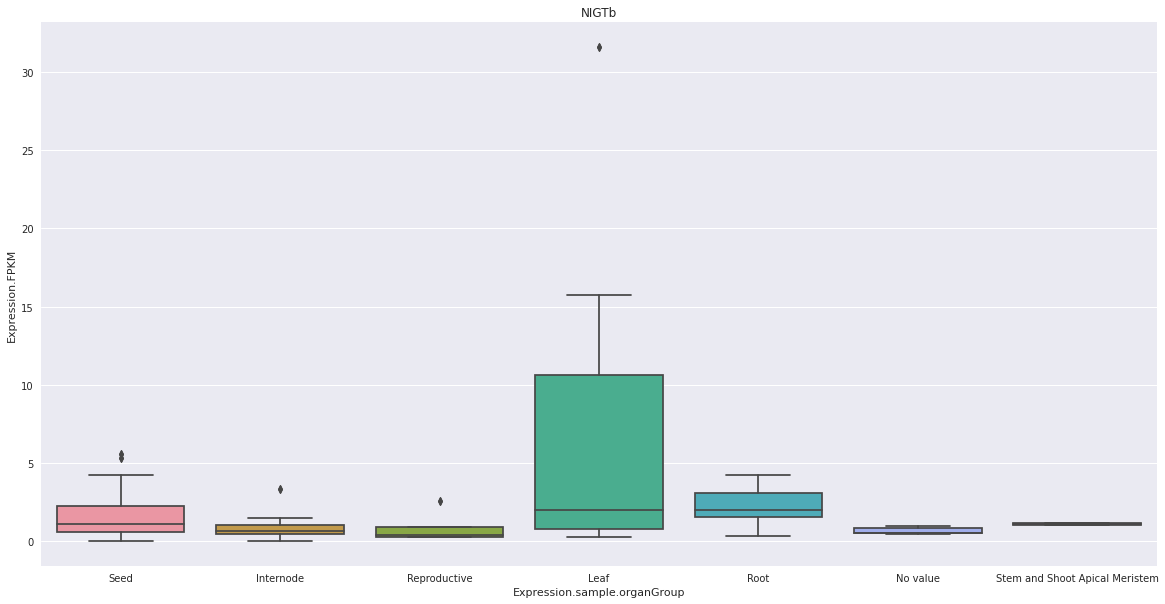

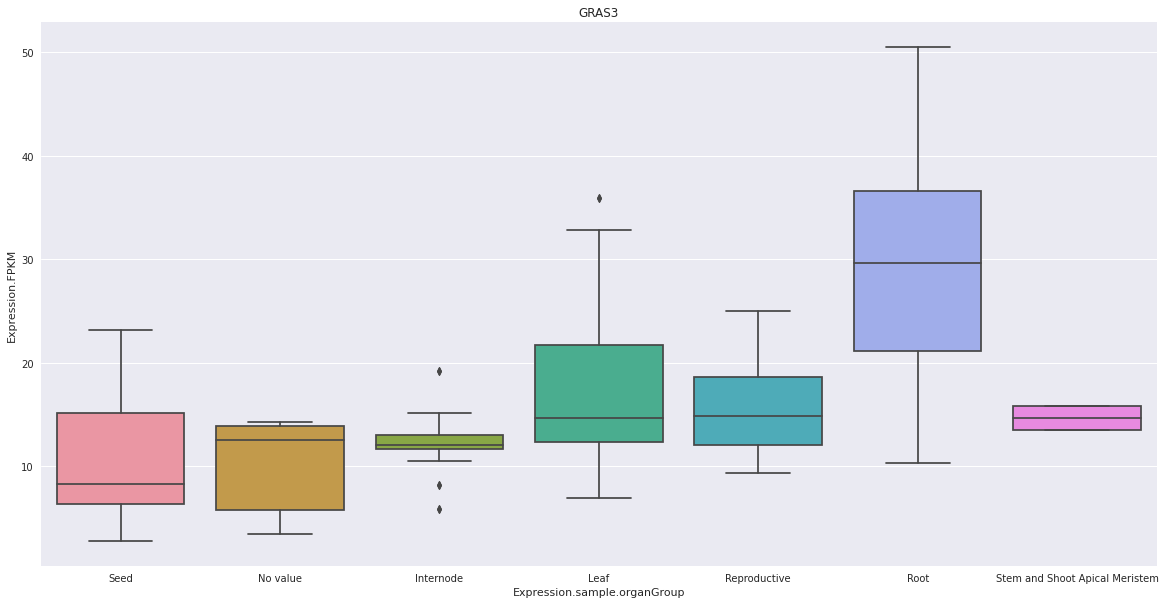

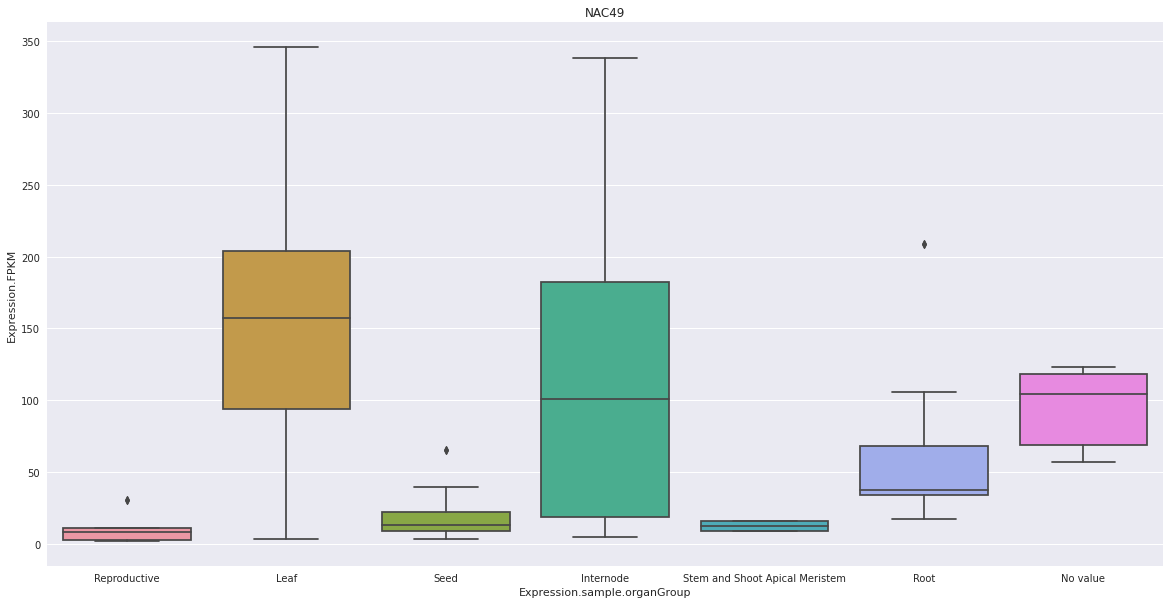

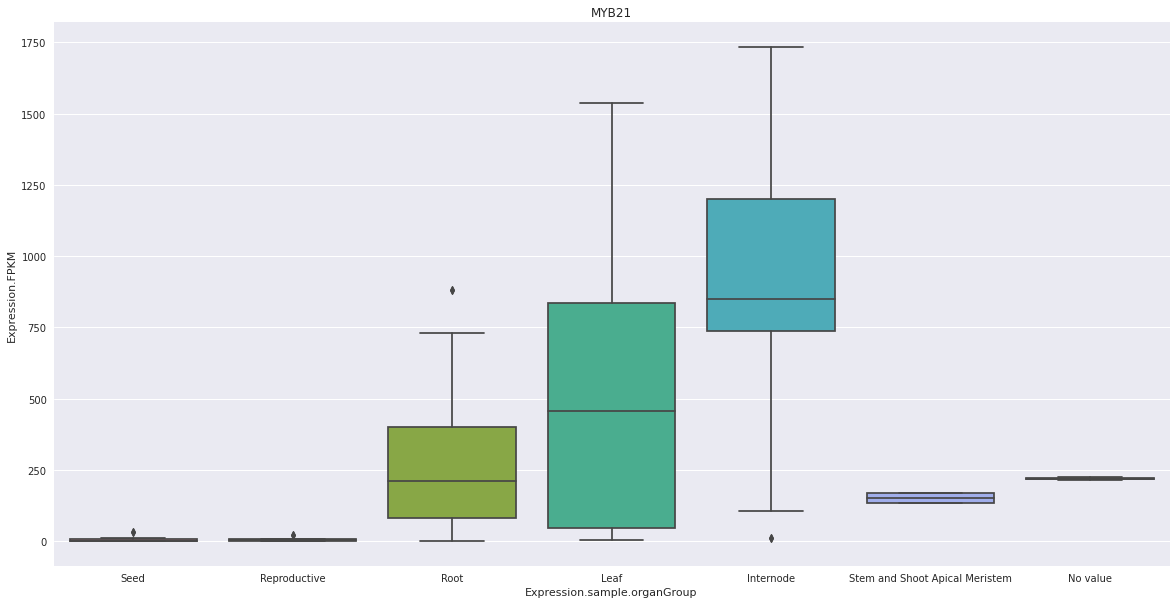

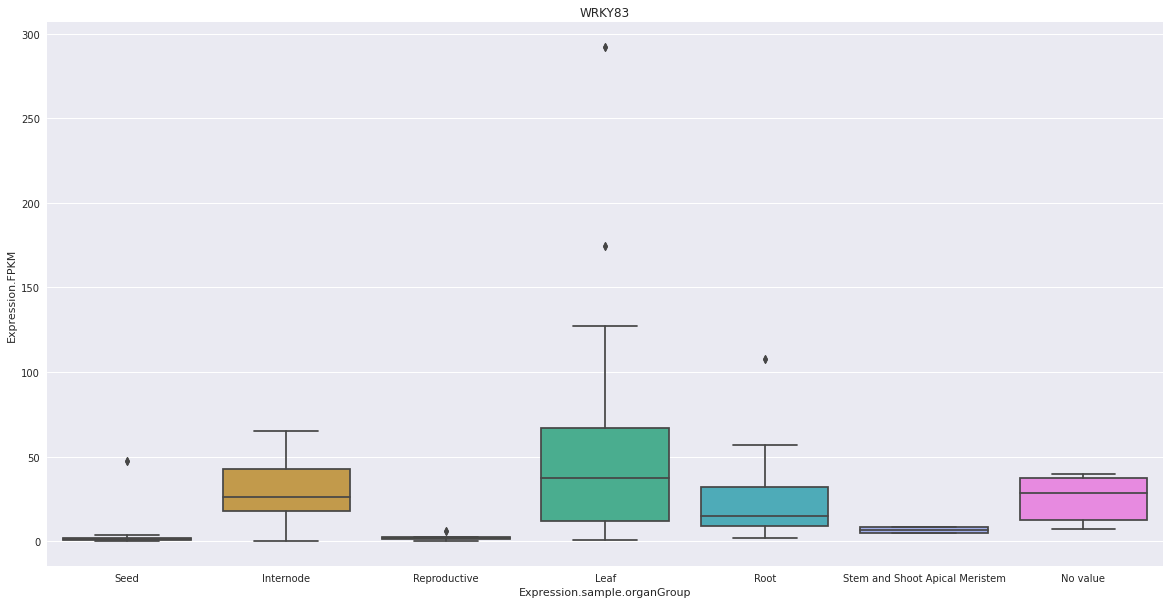

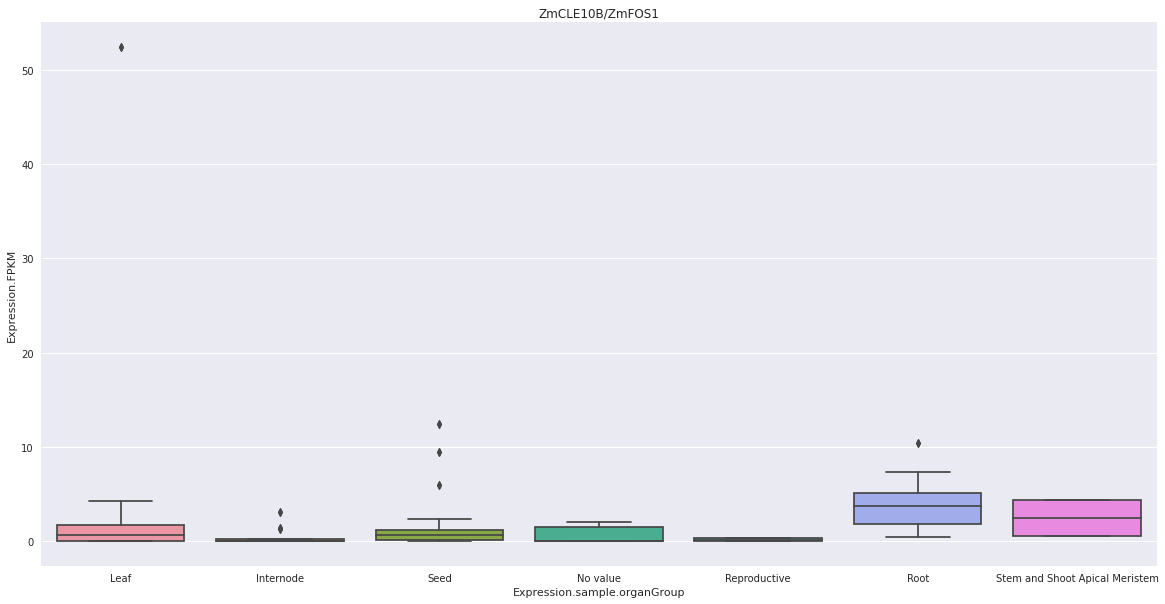

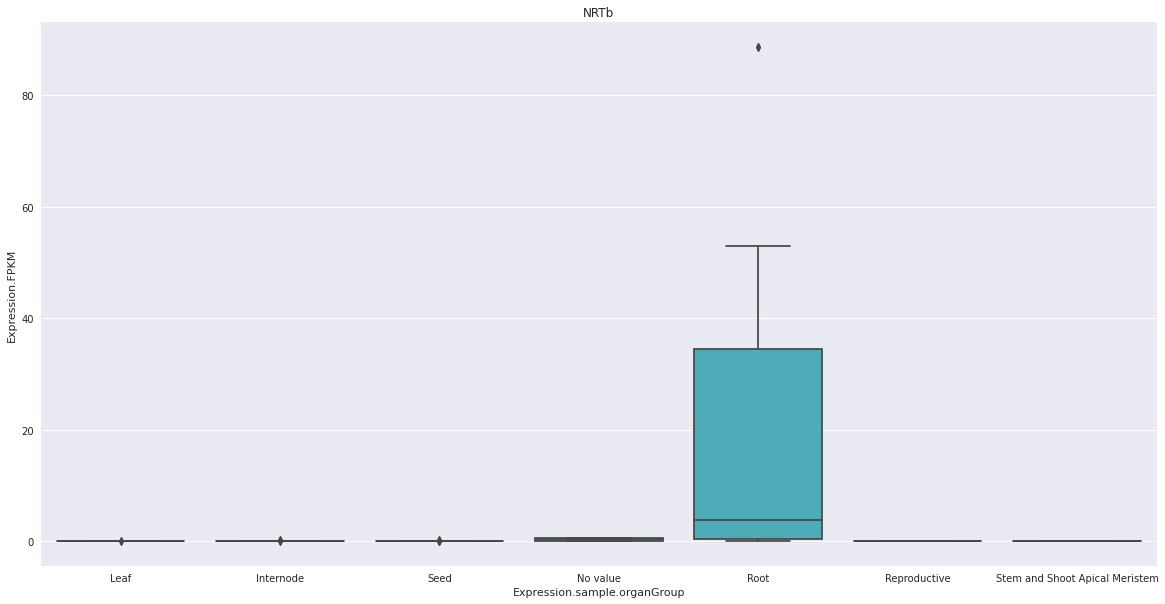

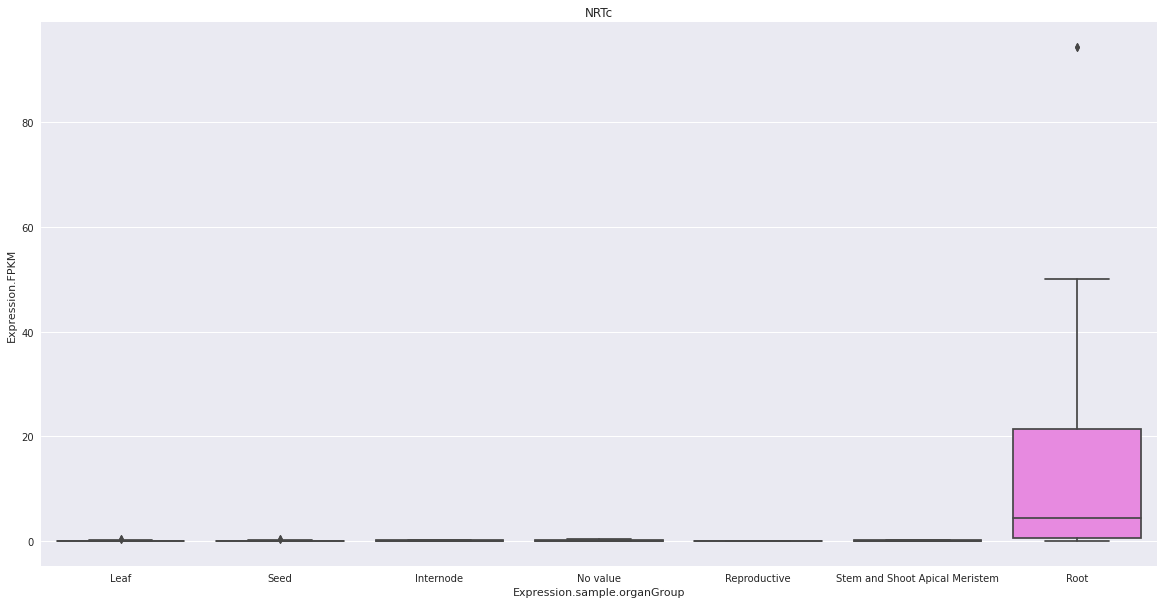

In [177]:
rcParams['figure.figsize'] = 20, 10
for i,kf in df.groupby('Expression.gene.primaryIdentifier'):
    sns.boxplot(data=kf,x='Expression.sample.organGroup',y='Expression.FPKM')
    plt.title(conv[i])
#     plt.show()
    plt.savefig('expression_plots/Organ_specific_expression_{}.png'.format(conv[i].replace('/','-')))
    plt.show()

## 2. Cross reference

In [10]:
query = service.new_query("Gene")

# The view specifies the output columns
query.add_view(
    "primaryIdentifier", "source",
    "dbCrossReferences.referee.primaryIdentifier",
    "dbCrossReferences.referee.source"
)

# Uncomment and edit the line below (the default) to select a custom sort order:
# query.add_sort_order("Gene.primaryIdentifier", "ASC")

# You can edit the constraint values below
query.add_constraint("Gene", "IN", list_name, code = "A")


<ListConstraint: Gene IN GOI>

In [12]:
cross=pd.concat([pd.DataFrame(row.to_d(), index=[0]) for row in query.rows()])

In [14]:
v=cross.drop_duplicates('Gene.primaryIdentifier')

v

,Gene.biotype,Gene.briefDescription,Gene.description,Gene.id,Gene.length,Gene.name,Gene.primaryIdentifier,Gene.score,Gene.scoreType,Gene.secondaryIdentifier,Gene.source,Gene.status,Gene.symbol,Gene.dbCrossReferences.referee.primaryIdentifier,Gene.dbCrossReferences.referee.source
0,protein_coding,None,Beta-glucanase [Source:UniProtKB/TrEMBL;Acc:Q6...,151739589,2250,None,Zm00001d013269,None,None,None,AGPv4,accepted,None,542684,RefSeq
0,protein_coding,None,G2-like transcription factor [Source:UniProtKB...,149752217,1976,None,Zm00001d023411,None,None,None,AGPv4,accepted,None,100193306,RefSeq
0,protein_coding,None,High affinity nitrate transporter [Source:UniP...,151679500,1575,None,Zm00001d054060,None,None,None,AGPv4,accepted,None,606442,RefSeq
0,protein_coding,None,High affinity nitrate transporter [Source:UniP...,151679494,1575,None,Zm00001d054057,None,None,None,AGPv4,accepted,None,542092,RefSeq
0,protein_coding,None,Isocitrate lyase [Source:UniProtKB/TrEMBL;Acc:...,152930957,2073,None,Zm00001d021666,None,None,None,AGPv4,accepted,None,103633249,RefSeq
0,protein_coding,None,NAC domain-containing protein 67 [Source:UniPr...,149675211,1819,None,Zm00001d034601,None,None,None,AGPv4,accepted,None,100170665,RefSeq
0,protein_coding,None,Putative MYB DNA-binding domain superfamily pr...,149752121,2033,None,Zm00001d023402,None,None,None,AGPv4,accepted,None,100216751,RefSeq
0,protein_coding,None,Putative WRKY DNA-binding domain superfamily p...,153233418,2233,None,Zm00001d010399,None,None,None,AGPv4,accepted,None,100281160,RefSeq
0,protein_coding,None,Putative geranylgeranyl pyrophosphate synthase...,153091021,1092,None,Zm00001d008370,None,None,None,AGPv4,accepted,None,100502524,RefSeq
0,protein_coding,None,Putative uncharacterized protein [Source:UniPr...,153374530,2785,None,Zm00001d011708,None,None,None,AGPv4,accepted,None,100278855,RefSeq


### 3. Extract homologues

In [57]:
# Connect to maize mine service
service = Service("http://maizemine.rnet.missouri.edu:8080/maizemine/service",username="averstichele@inari.com",password="mineminemine")


In [16]:
query = service.new_query("Homologue")

# The view specifies the output columns
query.add_view(
    "gene.primaryIdentifier", "homologue.primaryIdentifier",
    "homologue.organism.shortName", "type"
)

# Uncomment and edit the line below (the default) to select a custom sort order:
# query.add_sort_order("Homologue.gene.primaryIdentifier", "ASC")

# You can edit the constraint values below
query.add_constraint("gene", "IN", list_name, code = "A")
query.add_constraint("homologue.organism", "LOOKUP", "A. thaliana", "", code = "B")
# Uncomment and edit the code below to specify your own custom logic:
# query.set_logic("A")



<TernaryConstraint: Homologue.homologue.organism LOOKUP A. thaliana IN >

In [17]:
d=pd.concat([pd.DataFrame(row.to_d(), index=[0]) for row in query.rows()])

In [18]:
d.head()

,Homologue.confidenceScore,Homologue.id,Homologue.lastCommonAncestor,Homologue.type,Homologue.gene.primaryIdentifier,Homologue.homologue.primaryIdentifier,Homologue.homologue.organism.shortName
0,None,218053863,Magnoliophyta,ortholog_one2one,Zm00001d021666,AT3G21720,A. thaliana
0,None,218076026,Magnoliophyta,ortholog_many2many,Zm00001d030744,AT3G46600,A. thaliana
0,None,218083265,Magnoliophyta,ortholog_many2many,Zm00001d054060,AT5G60770,A. thaliana
0,None,218083267,Magnoliophyta,ortholog_many2many,Zm00001d054057,AT5G60770,A. thaliana
0,None,218083269,Magnoliophyta,ortholog_many2many,Zm00001d014976,AT5G60770,A. thaliana
